In [1]:
# -*- coding: utf-8 -*-
"""assign-quanti

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1ejZQZEIl9VJ7bywASW2uU86EFLtbPEt0
"""

import math
import numpy as np
from skimage.io import imread, imsave
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
#start from here
def colors_and_counts(img):
  color_map = {}
  checker = []
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      color = str(img[i][j][0]) + str(img[i][j][1]) + str(img[i][j][2])
      color1 = str(img[i][j][0]) +':'+ str(img[i][j][1]) +':'+ str(img[i][j][2])
      #print(str(color1))
      if str(color) in color_map.keys():
        # color_map[str(color)]['i'].append([img[i][j][0], img[i][j][1], img[i][j][2]])
        color_map[str(color)][3] += 1
      else:
        color_map.update({str(color):[img[i][j][0], img[i][j][1], img[i][j][2], 1]})
  print('Getting colors and counts.....')
  #print(color_map)
  k= list(color_map.values())
  k.sort(key=lambda x:x[3],reverse=True)
  return k

In [3]:
import math
def euclid(frequent,pixel):
  distances = []
  for i in frequent:
    point_a = np. array(pixel)
    point_b = np. array(i[:3])
    distance = np. linalg. norm(point_a - point_b)
    distances.append(distance)
  mini = min(distances)
  index = distances.index(mini)
  pix = frequent[index]
  return pix[:3]

In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

Getting colors and counts.....


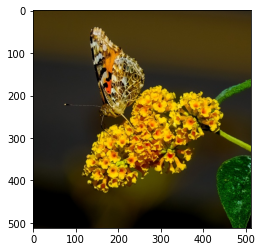

In [5]:
# img = cv2.imread('/content/offset_comp_772626-opt.jpg')
img = cv2.imread('data/input/flower.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
fullresult= colors_and_counts(img)

k= 512
frequent= fullresult[:k]
# print(frequent)
checker = []
for i in frequent:
  f1 = ''
  for j in range(len(i)-1):
      if(j==0):
        f1+=str(i[j])
      else:
        f1+= ':'+str(i[j])
  checker.append(f1)
# print(checker)

In [6]:
img.shape

(512, 512, 3)

In [7]:
def popular_img(img):
  new_arr=np.zeros(img.shape,dtype=np.int8)
  #print(new)
  img_arr = np.asarray(img)
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      pixel=img_arr[i][j]
      #print(pixel)
      s1=str(pixel[0])+':'+str(pixel[1])+':'+str(pixel[2])
      #print(s1)
      if s1 in checker:
        new_arr[i][j] = pixel
      else:
        new_arr[i][j] = euclid(frequent,pixel)
  return new_arr

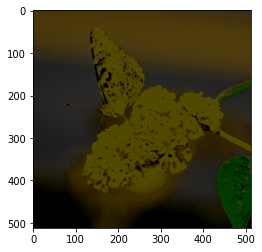

In [8]:
new_arr = popular_img(img)
plt.imshow(new_arr)

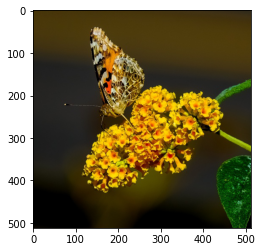

In [9]:
"""# Median Cut"""

img = np.array(Image.open('data/input/flower.jpg'))
plt.imshow(img)

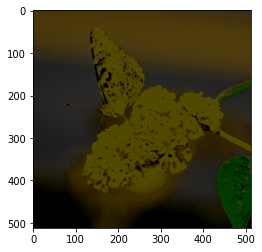

In [10]:
plt.imshow(new_arr)

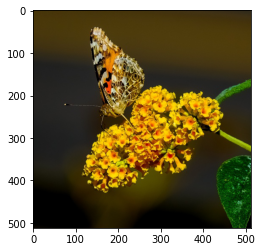

In [11]:
plt.imshow(img)

In [12]:
def colors_and_counts(img):
  color_map = {}
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      color = str(img[i][j][0]) + str(img[i][j][1]) + str(img[i][j][2])
      # print(str(color))
      if str(color) in color_map.keys():
        # color_map[str(color)]['i'].append([img[i][j][0], img[i][j][1], img[i][j][2]])
        color_map[str(color)][3] += 1
        color_map[str(color)][-1].append((i, j))
      else:
        color_map.update({str(color):[img[i][j][0], img[i][j][1], img[i][j][2], 1, [(i, j)]]})
  print('Getting colors and counts.....')
  return list(color_map.values())

In [13]:
cnc = colors_and_counts(img)

cnc

Getting colors and counts.....


[[69, 50, 7, 2, [(0, 0), (0, 10)]],
 [70,
  51,
  8,
  36,
  [(0, 1),
   (0, 7),
   (0, 9),
   (0, 11),
   (0, 15),
   (1, 0),
   (1, 3),
   (1, 4),
   (2, 3),
   (2, 4),
   (3, 3),
   (3, 4),
   (3, 8),
   (3, 9),
   (3, 10),
   (3, 11),
   (3, 12),
   (3, 13),
   (3, 64),
   (3, 65),
   (5, 50),
   (7, 17),
   (7, 21),
   (7, 97),
   (7, 191),
   (8, 55),
   (8, 58),
   (8, 59),
   (8, 98),
   (8, 99),
   (9, 58),
   (12, 27),
   (32, 464),
   (32, 471),
   (32, 479),
   (238, 319)]],
 [71,
  52,
  9,
  155,
  [(0, 2),
   (0, 3),
   (0, 4),
   (0, 5),
   (0, 6),
   (0, 8),
   (0, 12),
   (0, 13),
   (0, 14),
   (1, 1),
   (1, 2),
   (1, 5),
   (1, 6),
   (1, 7),
   (1, 9),
   (1, 10),
   (1, 11),
   (2, 0),
   (2, 1),
   (2, 2),
   (2, 5),
   (2, 8),
   (2, 9),
   (2, 10),
   (2, 11),
   (2, 12),
   (2, 13),
   (2, 14),
   (2, 15),
   (3, 0),
   (3, 1),
   (3, 2),
   (3, 5),
   (3, 14),
   (3, 15),
   (4, 64),
   (4, 65),
   (4, 67),
   (5, 48),
   (5, 49),
   (5, 51),
   (5, 52),
  

In [14]:
def find_max_box_dimension(b):
  sizer = b[3] - b[2]
  sizeg = b[5] - b[4]
  sizeb = b[7] - b[6]
  print('Finding maximum box dimension')
  if (sizer >= sizeg) and (sizer >= sizeb):
   return 0
  elif (sizeg >= sizer) and (sizeg >= sizeb):
    return 1
  else:
    return 2

In [15]:
def create_color_box(C, level):
  # colors = np.array(C)[:,:-1]
  colors = np.array(C)
  rmin = np.min(colors[:,0])
  rmax = np.max(colors[:,0])
  gmin = np.min(colors[:,1])
  gmax = np.max(colors[:,1])
  bmin = np.min(colors[:,2])
  bmax = np.max(colors[:,2])
  print('Creating color box with level: ', level)
  return [colors.tolist(), level, rmin, rmax, gmin, gmax, bmin, bmax]

In [16]:
def find_box_to_split(B):
  bs = []
  print('Finding box to split....')
  for b in B:
    if len(b[0]) >= 2:
      bs.append(b)
  if len(bs) == 0:
    return
  else:
    minl = float('inf')
    box = bs[0]
    for b in B:
      if b[1] < minl:
        minl = b[1]
        box = b
    return box

In [17]:
def split_box(b):
  m = b[1]
  d = find_max_box_dimension(b)
  C = b[0]
  C = np.array(C)
  C = C[C[:, d].argsort()]
  # C = C.tolist()
  median_index = int((len(C) + 1) / 2)
  c1 = C[:median_index]
  c2 = C[median_index:]

  # print(c1)
  # print(c2)

  print('Splitting the box.....')
  return (create_color_box(c1, m+1), create_color_box(c2, m+1))

In [18]:
def average_colors(b):
  C = b[0]
  n = 0
  rsum, gsum, bsum = 0, 0, 0
  for c in C:
    k = c[-2]
    n+=k
    rsum+=(k*c[0])
    gsum+=(k*c[1])
    bsum+=(k*c[2])
  ravg, gavg, bavg = rsum//n, gsum//n, bsum//n
  print('Finding the average of the colors.....')
  return [ravg, gavg, bavg]

In [19]:
def find_representative_colors(image, km, C):
  image2 = image.copy()
  if len(C) <= km:
    return C
  else:
    level = 0
    b0 = create_color_box(C, level)
    B = []
    B.append(b0)
    k = 1
    done = False
    while (k < km) and not done:
      b = find_box_to_split(B)
      if len(b)!=0:
        b1, b2 = split_box(b)
        B.append(b1)
        B.append(b2)
        B.remove(b)
        k+=1
      else:
        done = True
    cr = []
    for b in B:
      avg = average_colors(b)
      cr.append(avg)
      C = b[0]
      # print(avg)
      # print(C)
      for i in range(len(C)):
        for ri, ci in C[i][-1]:
          image2[ri][ci] = avg
      
    print('Finding CR values....')
    return image2, cr

In [20]:
# def quant_img(image, cr):
#   image2 = image.copy()
#   min = float('inf')
#   for i in range(image2.shape[0]):
#     for j in range(image2.shape[1]):
#       for c in cr:
#         dist = np.sqrt(np.sum(np.square(c-image[i][j])))
#         if dist < min:
#           min = dist
#           point = c
#       image2[i][j] = point
#   print('Quantizing the image.....')
#   return image2

def median_cut(image, km):
  C = colors_and_counts(image)
  # print(C)
  median, cr = find_representative_colors(image, km, C)
  return median, cr

Getting colors and counts.....
Creating color box with level:  0
Finding box to split....
Finding maximum box dimension
Splitting the box.....
Creating color box with level:  1
Creating color box with level:  1


<ipython-input-15-2d6a48c02940>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  colors = np.array(C)
<ipython-input-17-9f335f9284a0>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  C = np.array(C)


Finding box to split....
Finding maximum box dimension
Splitting the box.....
Creating color box with level:  2
Creating color box with level:  2
Finding box to split....
Finding maximum box dimension
Splitting the box.....
Creating color box with level:  2
Creating color box with level:  2
Finding the average of the colors.....
Finding the average of the colors.....
Finding the average of the colors.....
Finding the average of the colors.....
Finding CR values....
Getting colors and counts.....
Creating color box with level:  0
Finding box to split....
Finding maximum box dimension
Splitting the box.....
Creating color box with level:  1
Creating color box with level:  1
Finding box to split....
Finding maximum box dimension
Splitting the box.....
Creating color box with level:  2
Creating color box with level:  2
Finding box to split....
Finding maximum box dimension
Splitting the box.....
Creating color box with level:  2
Creating color box with level:  2
Finding box to split....
Fi

FileNotFoundError: The directory '/data/output' does not exist

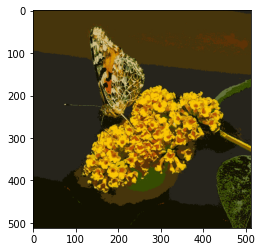

In [21]:
median,  cr = median_cut(img, 4)
plt.imshow(median)

median,  cr = median_cut(img, 16)
plt.imshow(median)

cr

median_cnc = colors_and_counts(median)

median_colors = []
for j in median_cnc:
  median_colors.append(j[:3])
median_colors


In [22]:
imsave('data/output/median4.png', median)
imsave('data/output/img.png', img)